In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import KFold
data = load_wine()

# TODO 1: print the features names in data.feature_names and data.target_names
print("features names in data.feature_names : {}".format(data.feature_names))
print("features names in data.target_names : {}".format(data.target_names))

features names in data.feature_names : ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
features names in data.target_names : ['class_0' 'class_1' 'class_2']


In [3]:
# TODO 2:
X = data.data
y = data.target
ynp = np.array(y)
print("Number of samples = {}".format(X.shape[0]))
print("Number of features = {}".format(X.shape[1]))
print("Number of classes = {}".format(np.max(ynp)+1))

Number of samples = 178
Number of features = 13
Number of classes = 3


In [4]:
from sklearn.preprocessing import StandardScaler

# TODO 3:
scaling = StandardScaler()
scaling.fit(X)
Xs = scaling.transform(X)

In [5]:
from sklearn.decomposition import PCA

# TODO 4:
# Construct the PCA object
ncomp = 2
pca = PCA(n_components=ncomp,svd_solver='randomized', whiten=True)
pca.fit(Xs)
Z = pca.transform(Xs)

Text(0, 0.5, 'PC1')

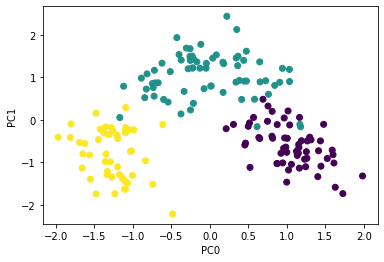

In [6]:
# TODO 5:
plt.scatter(Z[:,0],Z[:,1],c=y)
plt.xlabel("PC0")
plt.ylabel("PC1")

Text(0, 0.5, 'PoV')

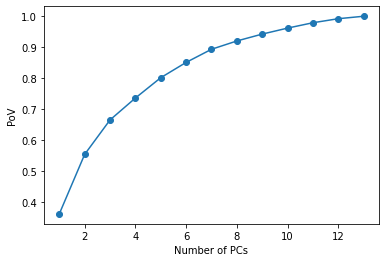

In [7]:
# TODO 6:
nfeatures = Xs.shape[1]
pca = PCA(n_components=nfeatures,svd_solver='randomized', whiten=True)
pca.fit(Xs)
Z = pca.transform(Xs)
lam =  pca.singular_values_ **2
PoV = np.cumsum(lam)/np.sum(lam)
xp = np.arange(1,nfeatures+1)
plt.plot(xp,PoV,'o-')
plt.xlabel('Number of PCs')
plt.ylabel('PoV')

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
nfold = 5

# Create a K-fold object
kf = KFold(n_splits=nfold)
kf.get_n_splits(X)

# Number of PCs to try
ncomp_test = np.arange(2,12)
num_nc = len(ncomp_test)

# Accuracy:  acc[icomp,ifold]  is test accuracy when using `ncomp = ncomp_test[icomp]` in fold `ifold`.
acc = np.zeros((num_nc,nfold))


# ==============
# TODO 7:(combined all)

# Loop over number of components to test
for icomp, ncomp in enumerate(ncomp_test):
    
    # Look over the folds
    for ifold, I in enumerate(kf.split(X)):
        Itr, Its = I

        # TODO:  Split data into training 
        Xtr = X[Itr]
        Xts = X[Its]
        ytr = y[Itr]
        yts = y[Its]

        # TODO:  Create a scaling object and fit the scaling on the training data
        scaler = StandardScaler()
        scaler.fit(Xtr)
        Xs = scaler.transform(Xtr)

        # TODO:  Fit the PCA on the scaled training data
        pca = PCA(n_components=ncomp,svd_solver='randomized', whiten=True)
        pca.fit(Xs)
        Xtr_trans = pca.transform(Xs)

        # TODO:  Train a classifier on the transformed training data
        # Use a logistic regression classifier
        logreg = LogisticRegression(multi_class='auto', solver='lbfgs')
        logreg.fit(Xtr_trans,ytr)

        # TODO:  Transform the test data through data scaler and PCA
        Xs_ts = scaler.transform(Xts)
        Xts_trans = pca.transform(Xs_ts)

        # TODO:  Predict the labels the test data
        yhat = logreg.predict(Xts_trans)
        
        # TODO:  Measure the accuracy 
        acc[icomp, ifold] = np.mean(yhat==yts)

(Normal Rule)Optimal number of components = 11, accuracy = 0.9553968253968254
(SE)Optimal number of components = 2, accuracy = 0.927142857142857


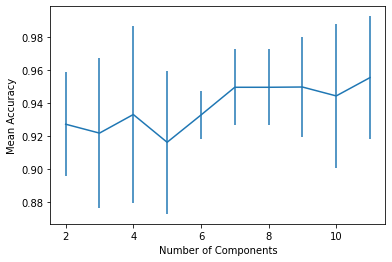

In [9]:
from numpy.ma.core import sqrt
# TODO 8: (Combined all)
acc_mean = np.mean(acc,axis=1)
acc_se = np.std(acc,axis=1) * sqrt(nfold)/sqrt(nfold-1)
plt.errorbar(ncomp_test,acc_mean,yerr=acc_se)
plt.xlabel("Number of Components")
plt.ylabel("Mean Accuracy")

# TODO:  Optimal order with the normal rule
im = np.argmax(acc_mean)
print("(Normal Rule)Optimal number of components = {}, accuracy = {}".format(ncomp_test[im],acc_mean[im]))
# TODO:  Optimal order with one SE rule
acc_tgt = acc_mean[im] - acc_se[im]
I = np.where(acc_mean >= acc_tgt)[0]
iopt = I[0]
print("(SE)Optimal number of components = {}, accuracy = {}".format(ncomp_test[iopt],acc_mean[iopt]))

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# TODO 9:
scaler = StandardScaler()
pca = PCA()
svc = SVC(kernel='rbf')
pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('svc', svc)])

In [11]:
# TODO 10:
ncomp_test = np.arange(3,10)
c_test = np.logspace(-2,3,6)
gam_test = np.logspace(-3,1,5)

In [12]:
# TODO 11:
params = {'pca__n_components': ncomp_test, 'svc__C' : c_test, 'svc__gamma' : gam_test}

In [13]:
# TODO 12:
estimator = GridSearchCV(pipe, params,cv=5,return_train_score=True)
estimator.fit(X,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('svc', SVC())]),
             param_grid={'pca__n_components': array([3, 4, 5, 6, 7, 8, 9]),
                         'svc__C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'svc__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])},
             return_train_score=True)

In [14]:
# TODO 13:
print("Best test score = {}".format(estimator.best_score_))
print("Best test parameters : {}".format(estimator.best_params_))

Best test score = 0.9777777777777779
Best test parameters : {'pca__n_components': 5, 'svc__C': 1.0, 'svc__gamma': 0.1}


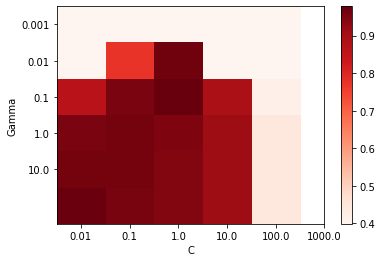

In [15]:
# TODO 14:
test_score = estimator.cv_results_['mean_test_score']
ncomp = len(ncomp_test)
nc = len(c_test)
ngam = len(gam_test)
test_score = test_score.reshape((ncomp,nc,ngam))
I = np.where(ncomp_test == 5)[0][0]

plt.imshow(test_score[I,:,:], aspect='auto', cmap='Reds')
plt.xlabel('C')
plt.ylabel('Gamma')
plt.colorbar()

ax = plt.gca()
ax.set_xticks(np.arange(0,nc))
ax.set_xticklabels(c_test)
ax.set_yticks(np.arange(0,ngam))
_ = ax.set_yticklabels(gam_test)
